## 6.4 Machine Learning Part 1

### This script contains the following:

1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis
- Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Tell Python to remember a main folder path
path = r'/Users/gideon/Desktop/King County_USA_House sales'

In [5]:
path

'/Users/gideon/Desktop/King County_USA_House sales'

In [6]:
# Upload the dataset of Housesales_in_USA as df_housesales
df_housesales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Housesales_in_USA.csv'))

### 2. Data cleaning

In [8]:
df_housesales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df_housesales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
df_housesales.shape

(21613, 21)

In [11]:
# Check for missing values

df_housesales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### No missing Values found

In [15]:
# Check for Duplicates

dups = df_housesales.duplicated()

In [13]:
dups.shape

(21613,)

#### No Duplicates found

/var/folders/d9/m6pz848x453dch7l819567br0000gn/T/ipykernel_2145/3765062396.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_housesales['price'], bins=25)


<Axes: xlabel='price', ylabel='Density'>

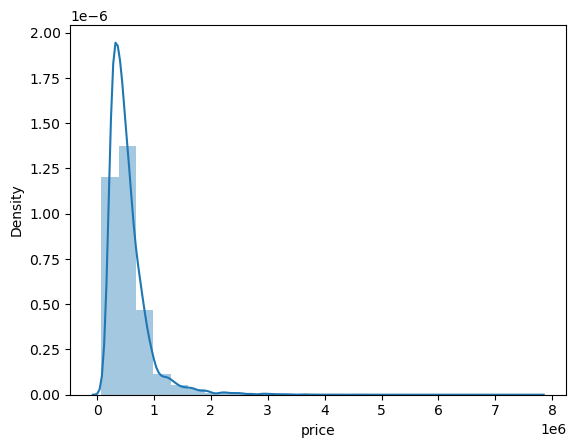

In [16]:
# Extreme values checks

sns.distplot(df_housesales['price'], bins=25)

In [17]:
# Check the mean

df_housesales['price'].mean() 

540088.1417665294

In [18]:
# Check the median

df_housesales['price'].median()

450000.0

In [19]:
# Check the max

df_housesales['price'].max()

7700000.0

### 3. Data prep for regression analysis 

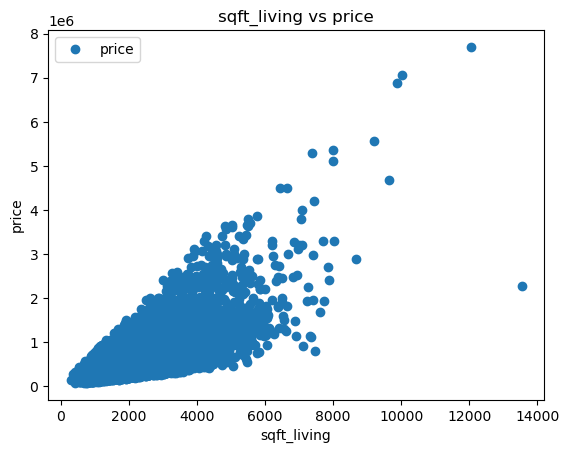

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_housesales.plot(x = 'sqft_living', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('sqft_living vs price')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_housesales['sqft_living'].values.reshape(-1,1)
y = df_housesales['price'].values.reshape(-1,1)

In [22]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [23]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

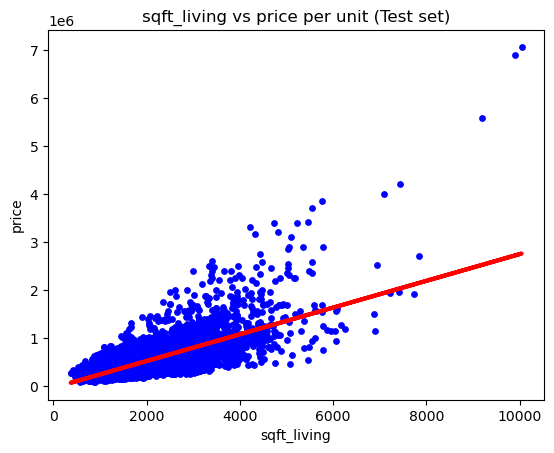

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('sqft_living vs price per unit (Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.1159
R2 score:  0.48889929019453027


#### From the values above: 
Slope value shows the positive correlation between the sqft living area and the price. 
From the Mean squared error value is quite large and the regression may not be the best model to represent this data and can't accurately predict the influence of sqft_living to the price of the house.
R2 score for this model is 0.4888993(approx). Since 49 percent is not that great of a fit either.

After this, it's pretty clear that the model isn't performing too well. 

In [32]:
y_predicted

array([[ 360116.30871034],
       [1261900.99358095],
       [ 362899.59477476],
       ...,
       [ 560512.90534826],
       [ 374032.73903242],
       [ 329500.16200177]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000.0,3.601163e+05
1,1578000.0,1.261901e+06
2,562100.0,3.628996e+05
3,631500.0,2.766177e+05
4,780000.0,8.471914e+05
5,485000.0,4.213486e+05
6,340000.0,4.408316e+05
7,335606.0,6.685044e+05
8,425000.0,6.467948e+05
9,490000.0,1.203452e+06


#### compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  67579354793.91106
R2 score:  0.49453356717789776


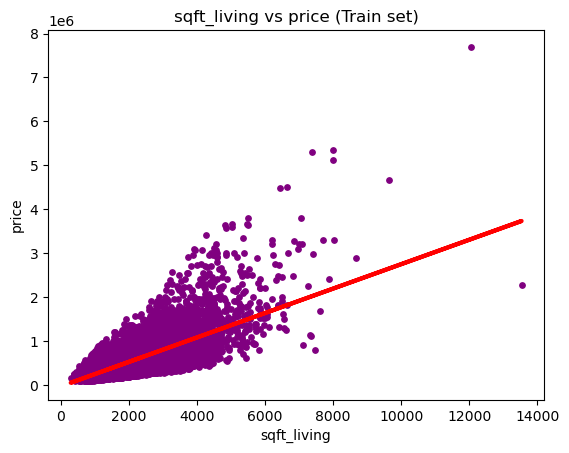

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='purple', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('sqft_living vs price (Train set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

#### Result: From the R2 score: 0.4945336. The model fits the training set only slightly better than the test set.

#### Conclusion: From the Analysis made, it is confirmed that the model is inaccurate, we can rule out the hypothesis "the larger the sqft_living area, the higher the price".

### Bonus: performance improvement after removing outliers

In [47]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_housesales[df_housesales['price'] >=400000] 

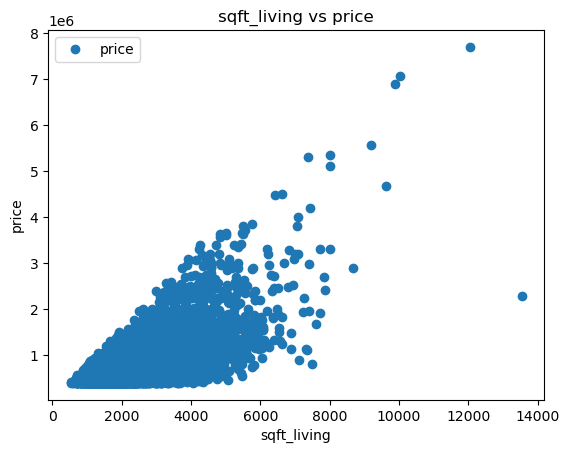

In [48]:
# See how the scatterplot looks without outliers.

df_test.plot(x ='sqft_living', y='price', style='o')  
plt.title('sqft_living vs price')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

In [55]:
# Reshape again.

X_2 = df_test['sqft_living'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [56]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [57]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [58]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [59]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [60]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[256.31027411]]
Mean squared error:  100905040320.10498
R2 score:  0.42659176764654905


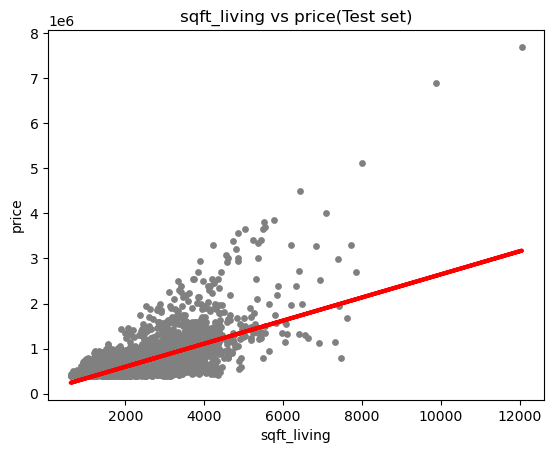

In [61]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('sqft_living vs price(Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

In [62]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,452000.0,780788.993864
1,442000.0,587018.426638
2,980000.0,856144.214452
3,555000.0,535756.371817
4,515100.0,616237.797887
5,1025000.0,797192.851407
6,796500.0,748493.899327
7,422000.0,676727.022576
8,538500.0,725425.974657
9,727500.0,402475.029280


### Conclusion: after the outliers are removed, the R2 score is lesser than before. So, it is not the best fitting model.
So, there are so many other variables which can be taken into account for further analysis and we can choose the variable that fits better to answer the business questions.

## END